# **LOGISTIC REGRESSION**

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import label_binarize
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from  sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc, confusion_matrix

In [56]:
df = pd.read_csv('../data/updated_dataset_with_3_clusters.csv')
df.head()

age  sex  chest_pain_type  resting_bp  max_heart_rate  exercise_angina  \
0   40    1                2         140             172                0   
1   49    0                3         160             156                0   
2   37    1                2         130              98                0   
3   48    0                4         138             108                1   
4   54    1                3         150             122                0   

   oldpeak  ST_slope  MI  cluster  
0      0.0         1   0        1  
1      1.0         2   1        1  
2      0.0         1   0        1  
3      1.5         2   1        0  
4      0.0         1   0        2

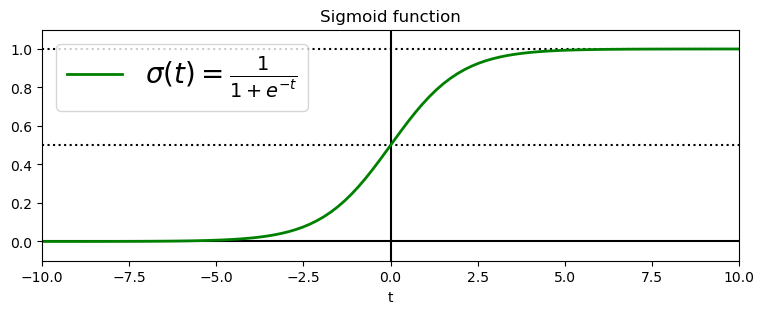

In [58]:
t= np.linspace(-10,10,100)
#feature=['age','oldpeak','max_heart_rate']
#t=df[feature]
sigmoid=1/(1+np.exp(-t))
plt.figure(figsize=(9,3))
plt.plot([-10,10],[0,0],"k-")
plt.plot([-10,10],[0.5,0.5],"k:")
plt.plot([-10,10],[1,1],"k:")
plt.plot([0,0],[-1.1,1.1],"k-")
plt.plot(t,sigmoid,"g-",linewidth=2, label=r"$\sigma(t)=\frac{1}{1+e^{-t}}$")
plt.title("Sigmoid function")
plt.xlabel("t")
plt.legend(loc="upper left", fontsize=20)
plt.axis([-10,10,-0.1,1.1])
plt.show()

In [60]:
#Checking distribution of target variable
df['cluster'].value_counts()

cluster
0    357
1    296
2    235
Name: count, dtype: int64

In [62]:
#Splitting features and target

features=df.drop(columns='cluster',axis=1)
cluster=df['cluster']

print(features)

     age  sex  chest_pain_type  resting_bp  max_heart_rate  exercise_angina  \
0     40    1                2         140             172                0   
1     49    0                3         160             156                0   
2     37    1                2         130              98                0   
3     48    0                4         138             108                1   
4     54    1                3         150             122                0   
..   ...  ...              ...         ...             ...              ...   
883   45    1                1         110             132                0   
884   68    1                4         144             141                0   
885   57    1                4         130             115                1   
886   57    0                2         130             174                0   
887   38    1                3         138             173                0   

     oldpeak  ST_slope  MI  
0        0.0         1

In [64]:
#Splitting data into training data and test data

features_train, features_test, cluster_train, cluster_test=train_test_split(features,cluster, test_size=0.2, stratify=cluster, random_state=2)

In [66]:
print(features.shape, features_train.shape, features_test.shape)

(888, 9) (710, 9) (178, 9)


In [68]:
scaler=StandardScaler()
f_train_scaled=scaler.fit_transform(features_train)
f_test_scaled=scaler.transform(features_test)

### Model Training

In [71]:
model=LogisticRegression(class_weight='balanced',solver='saga',max_iter=900, penalty='l2',C=0.002)


In [73]:
#training the Logistic regression model with training data
model.fit(f_train_scaled,cluster_train)

LogisticRegression(C=0.002, class_weight='balanced', max_iter=900,
                   solver='saga')

### Model Evaluation

In [76]:
#Accuracy score on training data
features_train_prediction=model.predict(f_train_scaled)
training_data_accuracy=accuracy_score(features_train_prediction, cluster_train)
print('Accuracy on training data: ',training_data_accuracy*100, '%')

Accuracy on training data:  92.67605633802816 %


In [78]:
#Accuracy score on test data
features_test_prediction =model.predict(f_test_scaled)
test_data_accuracy=accuracy_score(features_test_prediction,cluster_test)
print('Accurracy on test data: ',test_data_accuracy*100,'%')

Accurracy on test data:  94.9438202247191 %


In [80]:
print("Classification Report -Training Data")
print(classification_report(cluster_train, features_train_prediction))

Classification Report -Training Data
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       285
           1       0.90      0.98      0.94       237
           2       0.98      0.79      0.88       188

    accuracy                           0.93       710
   macro avg       0.93      0.91      0.92       710
weighted avg       0.93      0.93      0.93       710



In [82]:
print("Classification Report for Test Data:")
print(classification_report(cluster_test, features_test_prediction))

Classification Report for Test Data:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97        72
           1       0.93      0.97      0.95        59
           2       0.98      0.87      0.92        47

    accuracy                           0.95       178
   macro avg       0.95      0.94      0.95       178
weighted avg       0.95      0.95      0.95       178



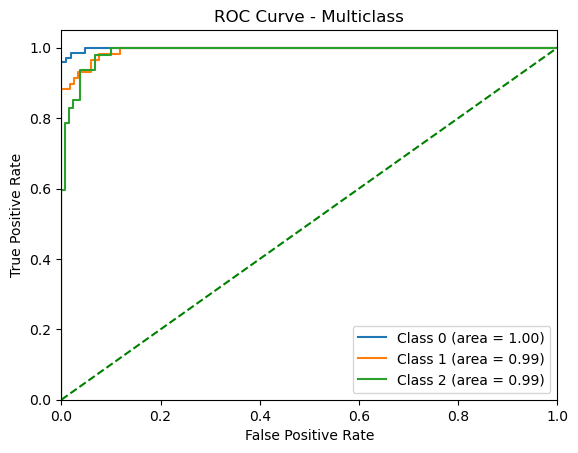

In [90]:
# 1. ROC Curve
binarize = label_binarize(cluster_test, classes=[0, 1, 2])
y_probs = model.predict_proba(f_test_scaled) 
fpr, tpr, thresholds, roc_auc = {}, {}, {}, {}

# Loop through each class
for i in range(binarize.shape[1]):
    fpr[i], tpr[i], thresholds[i] = roc_curve(binarize[:, i], y_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC Curve
plt.figure()
for i in range(binarize.shape[1]):  # Corrected to binarize
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (area = {roc_auc[i]:0.2f})')

plt.plot([0, 1], [0, 1], color='green', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Multiclass')
plt.legend(loc="lower right")
plt.show()

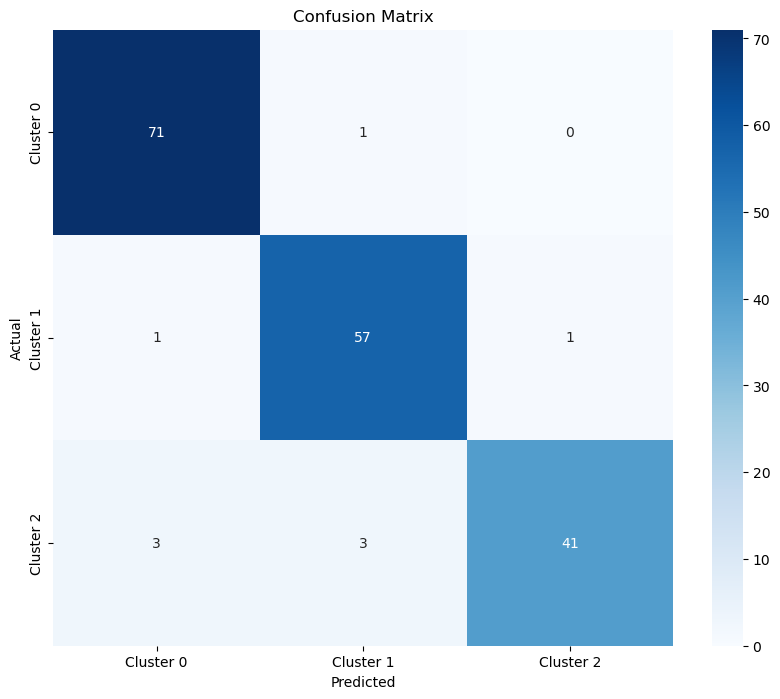

In [92]:
# 2. Confusion Matrix
cm = confusion_matrix(cluster_test, features_test_prediction)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Cluster 0', 'Cluster 1','Cluster 2'], yticklabels=['Cluster 0', 'Cluster 1','Cluster 2'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()
